# Data Visualization

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

## List of Orders Exploration

In [2]:
df_list_order = pd.read_csv('List of Orders.csv')
df_list_order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [3]:
df_list_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [4]:
df_list_order = df_list_order.dropna(axis=0)

In [5]:
df_list_order['Order Date'] = pd.to_datetime(df_list_order['Order Date'], format='%d-%m-%Y')

In [6]:
df_list_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.4+ KB


In [7]:
df_list_order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata


## Line plot : Number of order from each city

Text(0.5, 1.0, 'Order count form Each city')

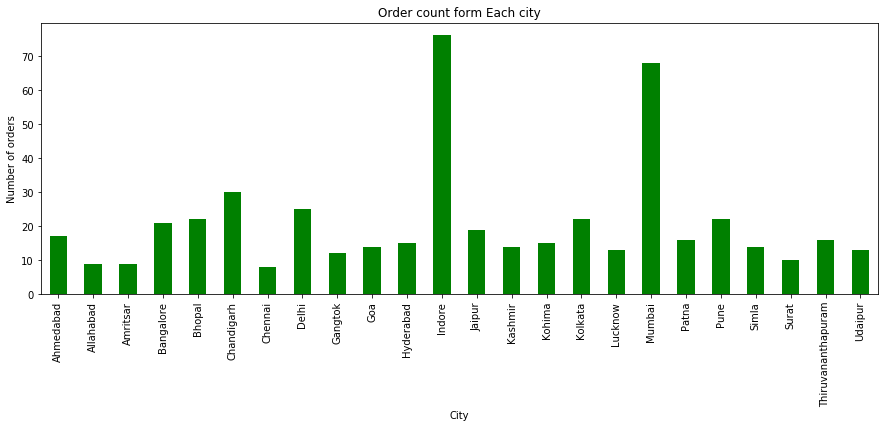

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
df_list_order.groupby('City').size().plot(kind='bar', color='green')
ax.set_xlabel('City')
ax.set_ylabel('Number of orders')
ax.set_title('Order count form Each city')

In [9]:
sr_city = df_list_order['City'].value_counts()
sr_city

Indore                76
Mumbai                68
Chandigarh            30
Delhi                 25
Bhopal                22
Kolkata               22
Pune                  22
Bangalore             21
Jaipur                19
Ahmedabad             17
Patna                 16
Thiruvananthapuram    16
Kohima                15
Hyderabad             15
Goa                   14
Simla                 14
Kashmir               14
Lucknow               13
Udaipur               13
Gangtok               12
Surat                 10
Allahabad              9
Amritsar               9
Chennai                8
Name: City, dtype: int64

### Word Cloud for Order from each City

In [10]:
word_cloud = WordCloud().generate_from_frequencies(sr_city)

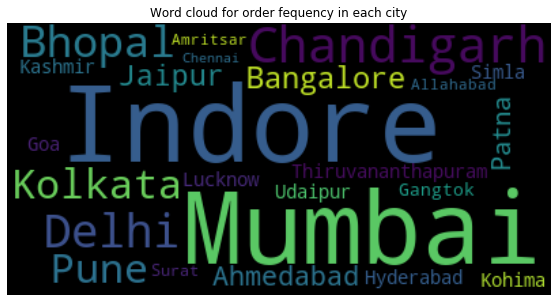

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
ax.set_title('Word cloud for order fequency in each city')
plt.show()

### Line Plot: Order in 2019

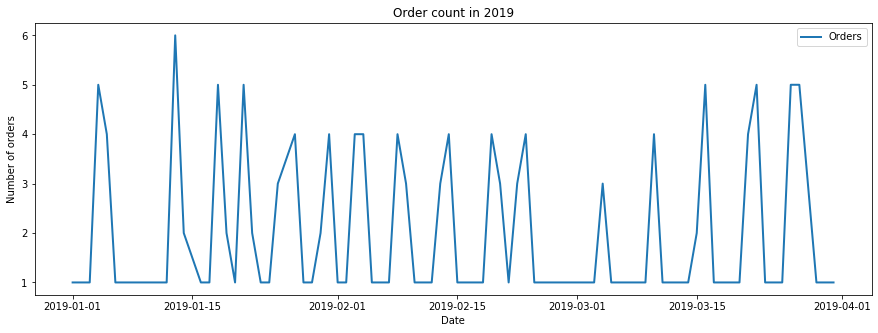

In [12]:
df_order_list_2019 = df_list_order[ (df_list_order['Order Date'] >= '01-01-2019') & (df_list_order['Order Date'] <= '05-01-2019') ]
sr_order_count_date = df_order_list_2019.groupby('Order Date').size()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sr_order_count_date, label='Orders', linewidth=2)

ax.set_title('Order count in 2019')
ax.set_xlabel('Date')
ax.set_ylabel('Number of orders')
ax.legend()

## Data 2 : Housing Price Data

In [14]:
df_house_price = pd.read_csv('HousePriceData.csv')
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
col_selected = ['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea']  
df_house_price_sel = df_house_price[col_selected]
df_house_price_sel['SalePrice'] = df_house_price['SalePrice']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [19]:
df_house_price_sel = df_house_price_sel.dropna(axis=0)
df_house_price_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1452 non-null   int64  
 1   OverallQual   1452 non-null   int64  
 2   YearBuilt     1452 non-null   int64  
 3   YearRemodAdd  1452 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1452 non-null   int64  
 6   BsmtUnfSF     1452 non-null   int64  
 7   TotalBsmtSF   1452 non-null   int64  
 8   2ndFlrSF      1452 non-null   int64  
 9   GrLivArea     1452 non-null   int64  
 10  SalePrice     1452 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 136.1 KB


### Scatter plots

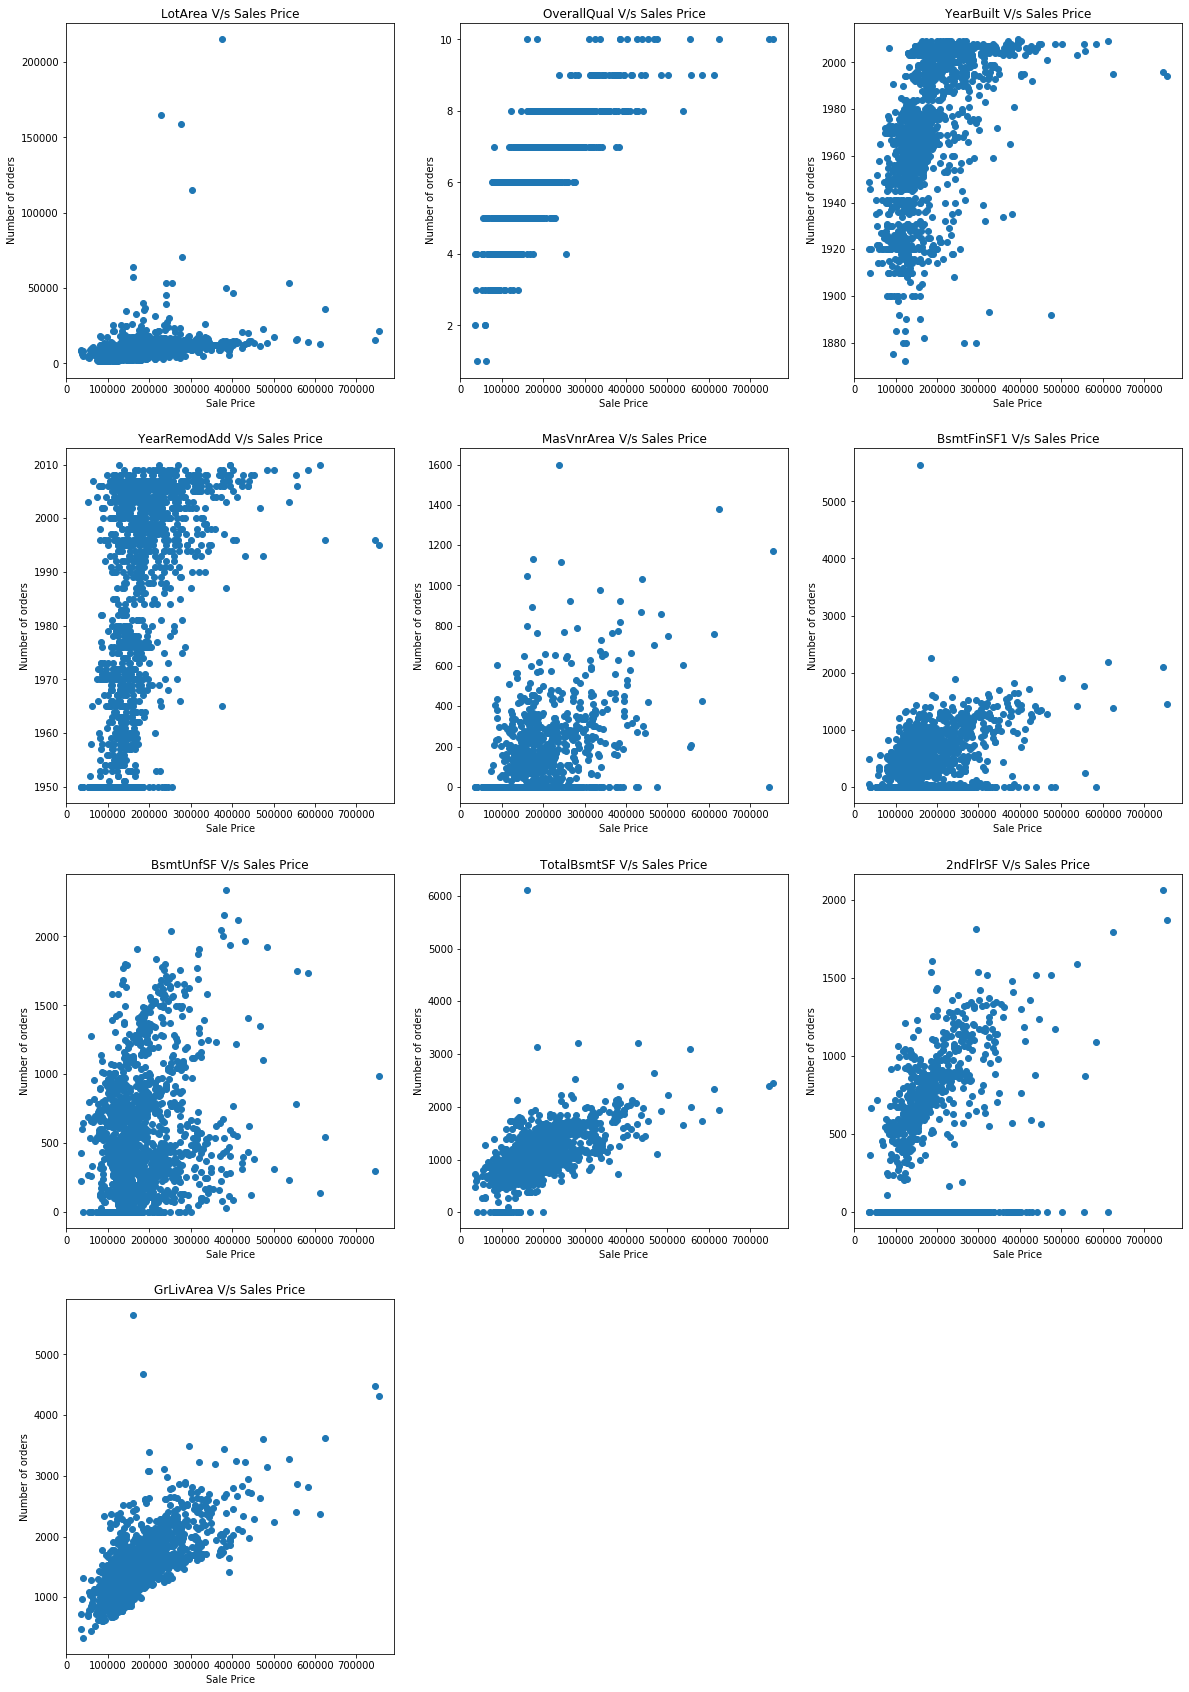

In [20]:
fig, ax = plt.subplots(figsize=(20, 30))
plt_count = 0

for col in col_selected:
    plt_count = plt_count + 1
    ax = plt.subplot(4, 3, plt_count)
    ax.scatter(df_house_price_sel.SalePrice, df_house_price_sel[col])
    title = col + ' V/s ' + 'Sales Price'
    ax.set_title(title)
    ax.set_xlabel('Sale Price')
    ax.set_ylabel('Number of orders')
plt.show()    

### Box Plot

Text(0.5, 1.0, 'Sales Price')

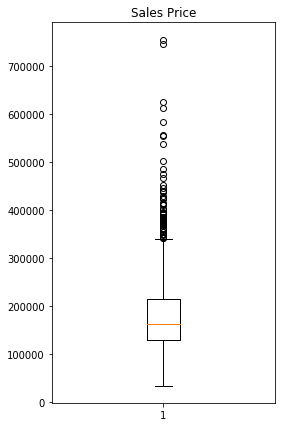

In [21]:
fig, ax = plt.subplots(figsize=(4, 7))

ax.boxplot(df_house_price_sel.SalePrice)
ax.set_title('Sales Price')

### Correlation Heat Map

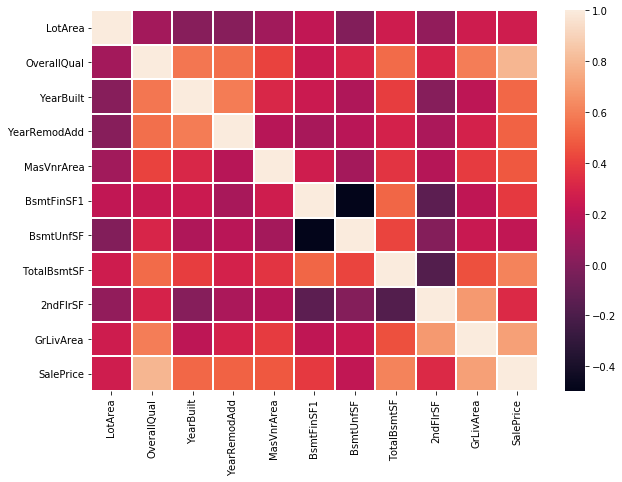

In [27]:
cor = df_house_price_sel.corr()
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(cor, linewidth =1)
plt.show()